In [1]:
import sys

sys.path.append("..")

In [2]:
import os

video_dir = "/media/adeshkadambi/WD_BLACK/PhD/adl_recognition/meal-preparation-cleanup"
video_name = "SCI02-1--4.MP4"

video_path = os.path.join(video_dir, video_name)
video_path

'/media/adeshkadambi/WD_BLACK/PhD/adl_recognition/meal-preparation-cleanup/SCI02-1--4.MP4'

In [3]:
import video_utils as vu

sampled_frames, sampled_indices, total_frames = vu.extract_frames(
    path=os.path.join(video_dir, video_name),
    sampling_method=vu.SamplingStrategy.UNIFORM,
    num_frames=5,
    save_frames=False,
)
print(f"Extracted {len(sampled_frames)} frames")
print(f"Sampled indices: {sampled_indices}")
print(f"Total frames: {total_frames}")

Extracted 5 frames
Sampled indices: [0, 149, 299, 449, 599]
Total frames: 600


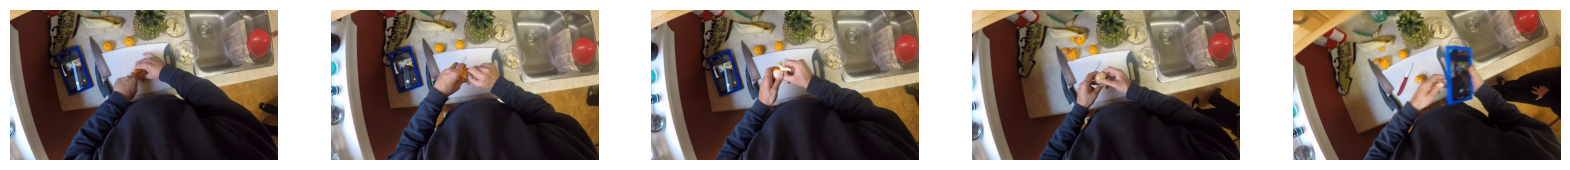

In [4]:
import matplotlib.pyplot as plt

# Display the sampled frames
fig, axs = plt.subplots(1, len(sampled_frames), figsize=(20, 20))
for i, frame in enumerate(sampled_frames):
    axs[i].imshow(frame)
    axs[i].axis("off")

In [5]:
sampled_frames, sampled_indices, total_frames = vu.extract_frames(
    path=os.path.join(video_dir, video_name),
    sampling_method=vu.SamplingStrategy.MOTION_GUIDED,
    num_frames=4,
    save_frames=False,
)
print(f"Extracted {len(sampled_frames)} frames")
print(f"Sampled indices: {sampled_indices}")
print(f"Total frames: {total_frames}")

Extracted 4 frames
Sampled indices: [np.int64(133), np.int64(270), np.int64(385), np.int64(478)]
Total frames: 600


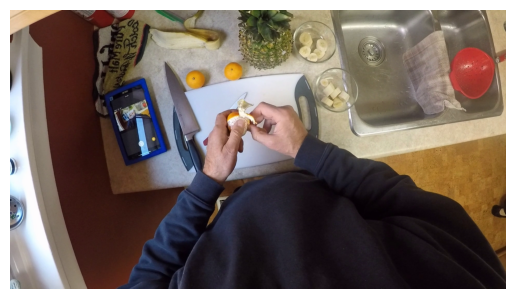

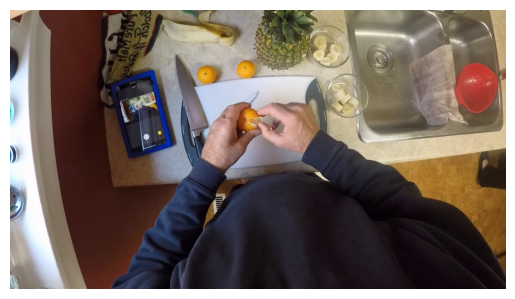

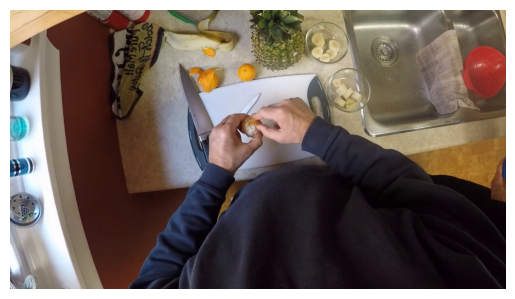

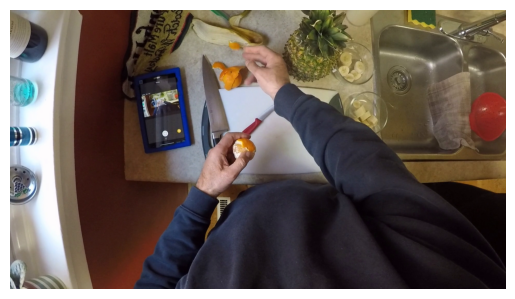

In [6]:
for i, frame in enumerate(sampled_frames):
    plt.imshow(frame)
    plt.axis("off")
    plt.show()

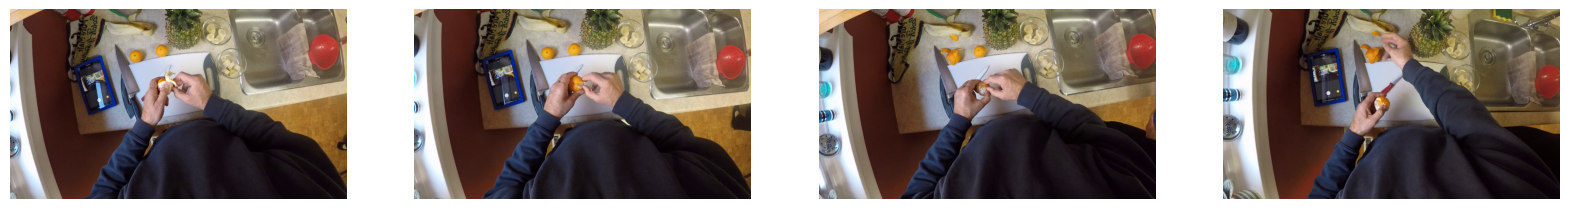

In [7]:
# Display the sampled frames
fig, axs = plt.subplots(1, len(sampled_frames), figsize=(20, 20))
for i, frame in enumerate(sampled_frames):
    axs[i].imshow(frame)
    axs[i].axis("off")

In [8]:
from inference import ADLClassifier

clf = ADLClassifier()

In [9]:
frame_descriptions = clf.analyse_frames(sampled_frames, sampled_indices, total_frames)

2025-02-24 21:53:05,161 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-02-24 21:53:11,315 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-02-24 21:53:17,703 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-02-24 21:53:25,249 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-02-24 21:53:25,250 - inference - INFO - Frame analysis completed.


In [10]:
for idx, frame in enumerate(frame_descriptions):
    print(f"Frame {idx}: {frame}")

Frame 0: **Frame 133 Description**

* **Room/Location:** The scene is set in a kitchen, as evidenced by the sink, countertop, and various kitchen utensils visible.
* **Objects Present:**
	+ Sink
	+ Countertop
	+ Knife
	+ Cutting board
	+ Pineapple
	+ Orange
	+ Banana peel
	+ Red bowl
	+ White towel
	+ Smartphone (likely the camera's viewfinder)
* **Objects Being Actively Interacted With:**
	+ The person is actively interacting with the knife, holding it in their right hand.
	+ They are also touching the pineapple and orange with their left hand.
* **Person's Actions:**
	+ The person appears to be peeling an orange using a knife.
	+ Their hands are moving in a coordinated manner, suggesting they are performing a task that requires dexterity and fine motor control.

**Observations**

* The person is wearing a dark-colored shirt or jacket, which may indicate their occupation or personal style.
* The kitchen appears to be clutter-free, with no visible obstacles or hazards that could impact

In [11]:
# temporal_description = clf.synthesize_context(frame_descriptions)

In [12]:
image_grid = clf._create_image_grid(sampled_frames)
adl_prediction = clf.classify_adl(frame_descriptions, image_grid)

2025-02-24 21:53:29,299 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-02-24 21:53:29,299 - inference - INFO - ADL classification completed.


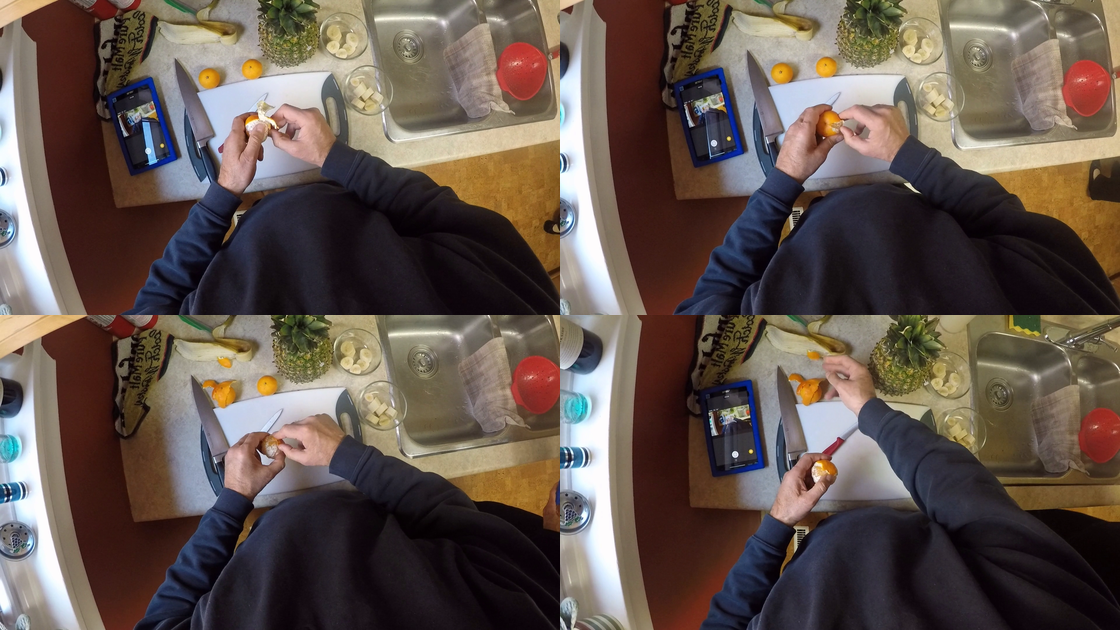

In [13]:
image_grid

In [14]:
print(adl_prediction)

{ 
  "Activity": "F) MEAL PREPARATION AND CLEANUP",
  "Alternate Activities": [],
  "Final List of Tags": [
    "cooking",
    "food preparation"
  ],
  "Reasoning": [
    "The video shows the person preparing food in a kitchen, which is consistent with meal preparation and cleanup.",
    "The tags 'cooking' and 'food preparation' are relevant because they appear in multiple frames and accurately describe the observed actions."
  ]
}
